In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# x_train, y_train 불러오기
x_train_encoding_df = pd.read_csv('./x_train_encoding_df.csv', encoding='utf-8')
y_train = pd.read_csv('./y_train.csv', encoding='utf-8')

# x_test, y_test 불러오기
x_test_encoding_df = pd.read_csv('./x_test_encoding_df.csv', encoding='utf-8')
y_test = pd.read_csv('./y_test.csv', encoding='utf-8')

# x_train_new 불러오기
x_train_encoding_new = pd.read_csv('./x_train_encoding_new.csv', encoding='utf-8')

# x_test_new 불러오기
x_test_encoding_new = pd.read_csv('./x_test_encoding_new.csv', encoding='utf-8')

In [3]:
# 비어있는 모델 객체 만들기
Logis_model = linear_model.LogisticRegression()

In [4]:
# train the model(df 로지스틱 회귀모델 적용 - family컬럼 아직 없음)
Logis_model.fit(x_train_encoding_df, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5]:
# 학습이 끝난 모델 학습하기
pred_test = Logis_model.predict_proba(x_test_encoding_df)
pred_test

array([[0.11733679, 0.88266321],
       [0.90195409, 0.09804591],
       [0.93964077, 0.06035923],
       [0.18843192, 0.81156808],
       [0.10253391, 0.89746609],
       [0.72352246, 0.27647754],
       [0.90864697, 0.09135303],
       [0.40926055, 0.59073945],
       [0.84657363, 0.15342637],
       [0.65196347, 0.34803653],
       [0.28150025, 0.71849975],
       [0.88329662, 0.11670338],
       [0.68475238, 0.31524762],
       [0.94592405, 0.05407595],
       [0.88902349, 0.11097651],
       [0.2409466 , 0.7590534 ],
       [0.07095194, 0.92904806],
       [0.90465023, 0.09534977],
       [0.831353  , 0.168647  ],
       [0.65211629, 0.34788371],
       [0.09297029, 0.90702971],
       [0.50274114, 0.49725886],
       [0.85519411, 0.14480589],
       [0.91614201, 0.08385799],
       [0.55746769, 0.44253231],
       [0.9625334 , 0.0374666 ],
       [0.81693958, 0.18306042],
       [0.88974254, 0.11025746],
       [0.18809373, 0.81190627],
       [0.91165661, 0.08834339],
       [0.

In [6]:
from sklearn.metrics import accuracy_score

# 모델 분류의 정확도

print('Accuracy: ', accuracy_score(Logis_model.predict(x_test_encoding_df), y_test))

Accuracy:  0.797752808988764


In [7]:
coef_df = pd.DataFrame(Logis_model.coef_, columns=['SibSp', 'Parch', 'Age', 'Fare', 'Female', 
                                                   'Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                                                   'Embarked_C', 'Embarked_Q', 'Embarked_S'],
                       index=['coef']).T

In [23]:
# 음수 -> 생존확률 낮아짐 
# 양수 -> 생존확률 높아짐
# 절대값이 클수록 생존확률에 영향을 크게 미치는 독립변수 

coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values('abs_coef', ascending=False)

,coef,abs_coef
Female,1.320821,1.320821
Male,-1.320786,1.320786
Pclass_3,-1.090505,1.090505
Pclass_1,0.951400,0.951400
Age,-0.368890,0.368890
Embarked_Q,0.320588,0.320588
SibSp,-0.299355,0.299355
Embarked_S,-0.266687,0.266687
Fare,0.151582,0.151582
Pclass_2,0.139140,0.139140


In [9]:
# 모델 시각화

from sklearn.metrics import roc_curve, auc #, roc_auc_score

# real y & predicted y
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])

# AUC 면적의 값 (수치)
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.8328877005347595


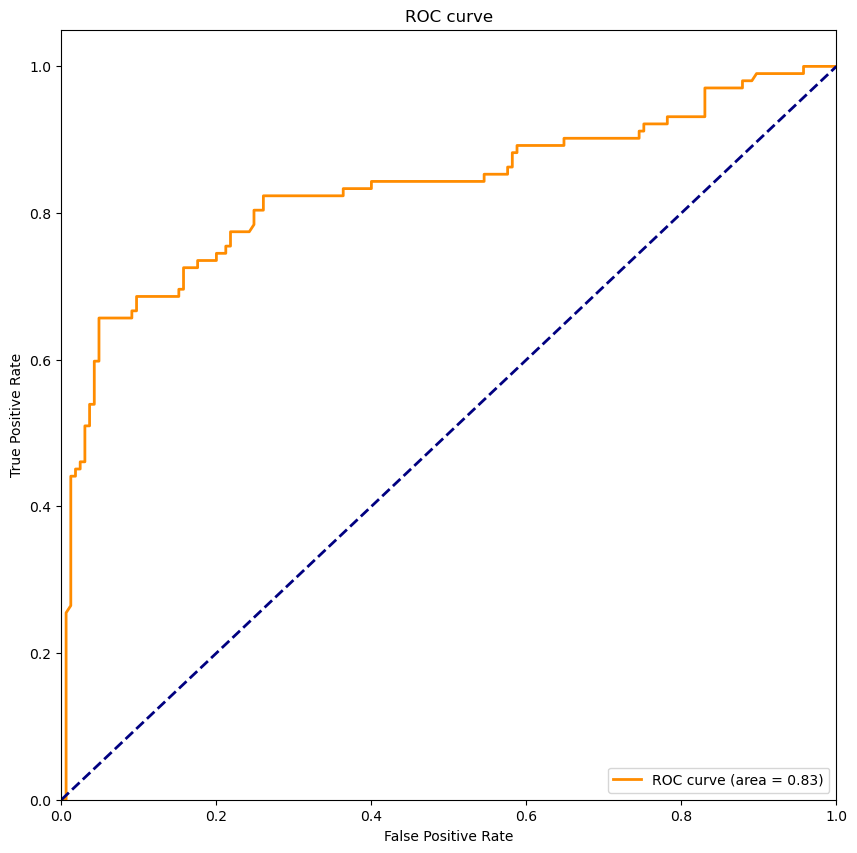

In [10]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right") # location
plt.title("ROC curve")

plt.show()

## family컬럼 생성 후 RogisticRegression 실행

In [11]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [12]:
# 비어있는 모델 객체 만들기
Logis_model_2 = linear_model.LogisticRegression() 

In [13]:
# family컬럼이 있는 df 회귀모델에 적용
Logis_model_2.fit(x_train_encoding_new, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
# 학습이 끝난 모델 학습하기

pred_test_2 = Logis_model_2.predict_proba(x_test_encoding_new) # Predict 'probability'

pred_test_2

array([[0.12568433, 0.87431567],
       [0.89771351, 0.10228649],
       [0.91527792, 0.08472208],
       [0.18784741, 0.81215259],
       [0.09155842, 0.90844158],
       [0.7297131 , 0.2702869 ],
       [0.90737155, 0.09262845],
       [0.37938626, 0.62061374],
       [0.8445686 , 0.1554314 ],
       [0.66292454, 0.33707546],
       [0.30055729, 0.69944271],
       [0.88605512, 0.11394488],
       [0.65786196, 0.34213804],
       [0.93160412, 0.06839588],
       [0.89134648, 0.10865352],
       [0.24417098, 0.75582902],
       [0.06270704, 0.93729296],
       [0.90584453, 0.09415547],
       [0.83011645, 0.16988355],
       [0.66367944, 0.33632056],
       [0.09055671, 0.90944329],
       [0.49556938, 0.50443062],
       [0.85773948, 0.14226052],
       [0.91658075, 0.08341925],
       [0.56659114, 0.43340886],
       [0.9511623 , 0.0488377 ],
       [0.81602451, 0.18397549],
       [0.89223786, 0.10776214],
       [0.20509015, 0.79490985],
       [0.91237847, 0.08762153],
       [0.

In [15]:
from sklearn.metrics import accuracy_score # accuracy

# 모델 분류의 정확도

print('Accuracy: ', accuracy_score(Logis_model_2.predict(x_test_encoding_new), y_test))

Accuracy:  0.8014981273408239


In [16]:
coef_df_2 = pd.DataFrame(Logis_model_2.coef_, columns=['Family', 'Age', 'Fare', 'Female', 
                                                   'Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                                                   'Embarked_C', 'Embarked_Q', 'Embarked_S'],
                       index=['coef']).T

In [20]:
# 음수 -> 생존확률 낮아짐 
# 양수 -> 생존확률 높아짐
# 절대값이 클수록 생존확률에 영향을 크게 미치는 독립변수 
coef_df_2['abs_coef'] = coef_df_2['coef'].abs()
coef_df_2.sort_values('abs_coef', ascending=False)

,coef,abs_coef
Female,1.330611,1.330611
Male,-1.330554,1.330554
Pclass_3,-1.076198,1.076198
Pclass_1,0.934767,0.934767
Age,-0.347420,0.347420
Embarked_Q,0.307541,0.307541
Embarked_S,-0.266398,0.266398
Family,-0.264806,0.264806
Fare,0.153667,0.153667
Pclass_2,0.141487,0.141487


In [24]:
# 모델 시각화

from sklearn.metrics import roc_curve, auc #, roc_auc_score

# real y & predicted y 
fpr2, tpr2, _ = roc_curve(y_true=y_test, y_score=pred_test_2[:,1])

# AUC 면적의 값 (수치)
roc_auc_2 = auc(fpr2, tpr2) 
print(roc_auc_2)

0.8321152703505643


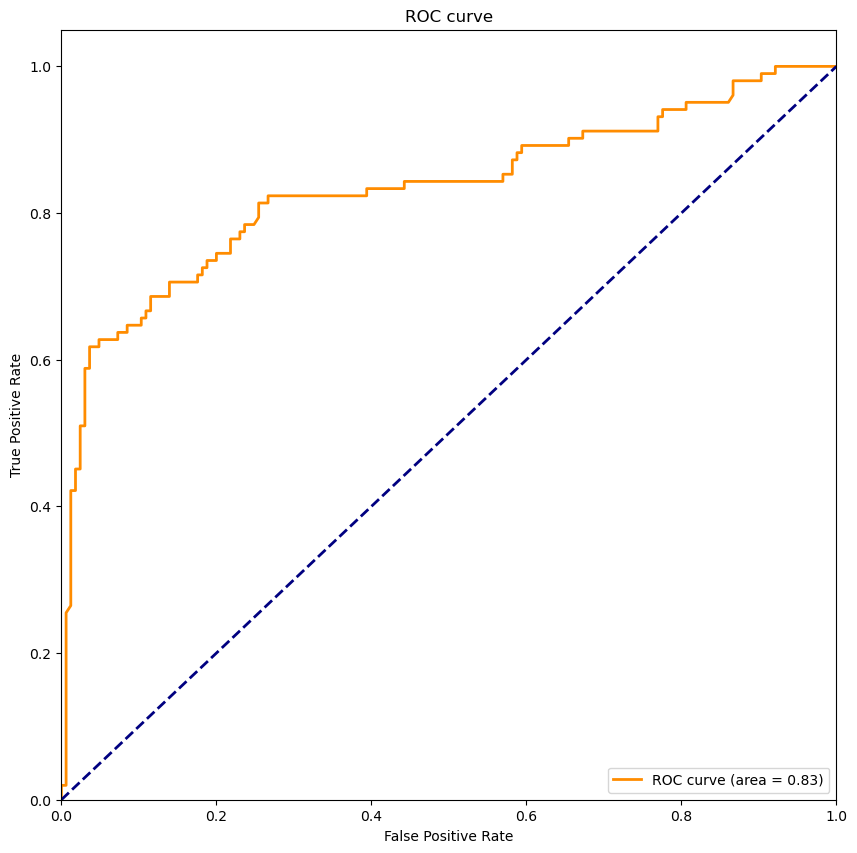

In [25]:
plt.figure(figsize=(10, 10))

plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right") # location
plt.title("ROC curve")

plt.show()